     LocationName                               Measure  Data_Value
1     51710000100  Housing cost burden among households        32.1
4     51710000201  Housing cost burden among households        39.2
7     51710000202  Housing cost burden among households        46.2
10    51710000300  Housing cost burden among households        44.2
13    51710000400  Housing cost burden among households        37.4
..            ...                                   ...         ...
217   51710006800  Housing cost burden among households        38.6
220   51710006901  Housing cost burden among households        32.3
223   51710006902  Housing cost burden among households        27.6
226   51710007001  Housing cost burden among households        49.7
229   51710007002  Housing cost burden among households        29.7

[77 rows x 3 columns]


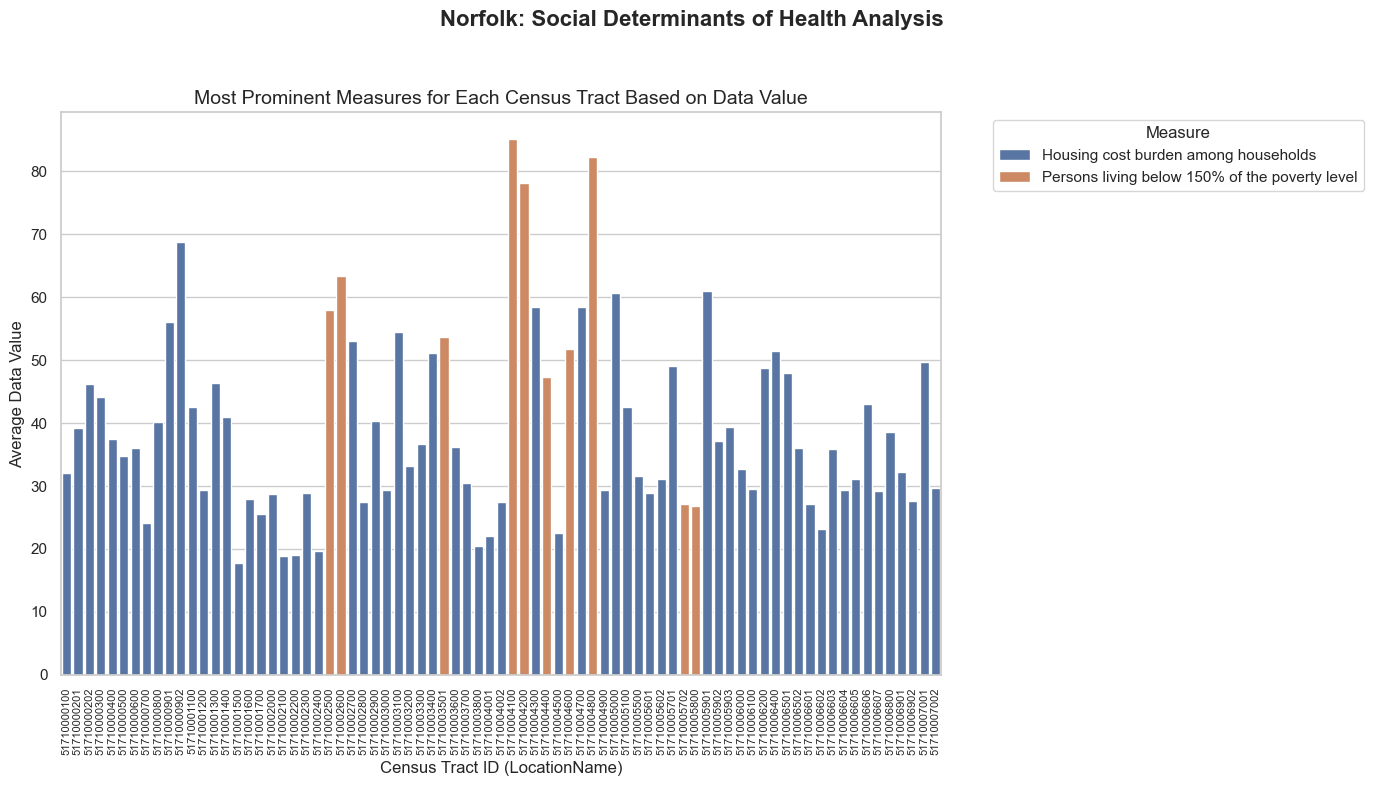

In [25]:
# Analysis of SDOH Data for Norfolk and Portsmouth, VA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (1) Loading the data from the provided CSV file
file_path = "Norfolk_SDOH_Measures_for_Census_Tract__ACS_2017-2021_20241022.csv"
data = pd.read_csv(file_path)

measures_of_interest = [
    'Crowding among housing units',
    'Persons living below 150% of the poverty level',
    'Housing cost burden among households'
]

# (2) Filtering the data for the specified measures
filtered_data = data[data['Measure'].isin(measures_of_interest)]

filtered_data = filtered_data.dropna(subset=['Data_Value'])

# (3) Grouping by 'LocationName' and 'Measure' and taking the mean of 'Data_Value'
measure_data_values = filtered_data.groupby(['LocationName', 'Measure'])['Data_Value'].mean().reset_index()

# (4) Identifying the measure with the highest average 'Data_Value' for each 'LocationName'
most_prominent_measures_filtered = measure_data_values.loc[measure_data_values.groupby('LocationName')['Data_Value'].idxmax()]

# (5) Sorting by LocationName for better readability
most_prominent_measures_filtered = most_prominent_measures_filtered.sort_values(by='LocationName')

# (6) Displaying the table of results
print(most_prominent_measures_filtered)


# (7) Setting up the plot size and style for better readability
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

plt.suptitle('Norfolk: Social Determinants of Health Analysis', fontsize=16, fontweight='bold')

# (8) Creating a bar plot of the most prominent measure values per LocationName
sns.barplot(
    data=most_prominent_measures_filtered,
    x='LocationName',
    y='Data_Value',
    hue='Measure',
    dodge=False
)

# (9) Setting plot labels and title for clarity
plt.xlabel('Census Tract ID (LocationName)', fontsize=12)
plt.ylabel('Average Data Value', fontsize=12)
plt.title('Most Prominent Measures for Each Census Tract Based on Data Value', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# (10) Displaying the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Norfolk_SDOH_Analysis.png', dpi=300)
plt.show()

     LocationName                               Measure  Data_Value
1     51710000100  Housing cost burden among households        32.1
4     51710000201  Housing cost burden among households        39.2
7     51710000202  Housing cost burden among households        46.2
10    51710000300  Housing cost burden among households        44.2
13    51710000400  Housing cost burden among households        37.4
..            ...                                   ...         ...
217   51710006800  Housing cost burden among households        38.6
220   51710006901  Housing cost burden among households        32.3
223   51710006902  Housing cost burden among households        27.6
226   51710007001  Housing cost burden among households        49.7
229   51710007002  Housing cost burden among households        29.7

[77 rows x 3 columns]


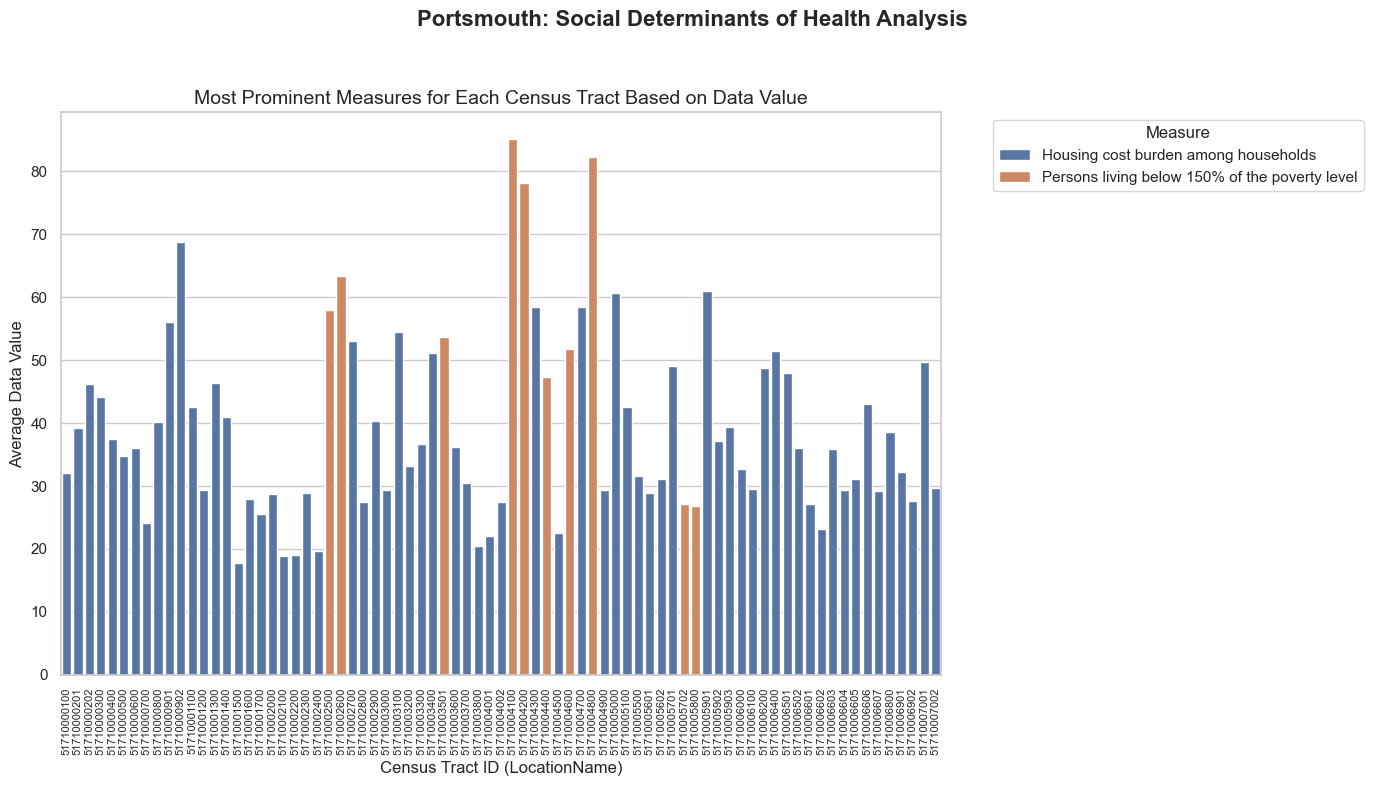

In [26]:
# Repeating above code for Portsmouth Social Determinants of Health data

file_path = "Portsmouth_SDOH_Measures_for_Census_Tract__ACS_2017-2021_20241023.csv"
data2 = pd.read_csv(file_path)

measures_of_interest = [
    'Crowding among housing units',
    'Persons living below 150% of the poverty level',
    'Housing cost burden among households'
]

filtered_data = data[data['Measure'].isin(measures_of_interest)]

filtered_data = filtered_data.dropna(subset=['Data_Value'])

measure_data_values = filtered_data.groupby(['LocationName', 'Measure'])['Data_Value'].mean().reset_index()

most_prominent_measures_filtered = measure_data_values.loc[measure_data_values.groupby('LocationName')['Data_Value'].idxmax()]

most_prominent_measures_filtered = most_prominent_measures_filtered.sort_values(by='LocationName')

print(most_prominent_measures_filtered)

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

plt.suptitle('Portsmouth: Social Determinants of Health Analysis', fontsize=16, fontweight='bold')

sns.barplot(
    data=most_prominent_measures_filtered,
    x='LocationName',
    y='Data_Value',
    hue='Measure',
    dodge=False
)

plt.xlabel('Census Tract ID (LocationName)', fontsize=12)
plt.ylabel('Average Data Value', fontsize=12)
plt.title('Most Prominent Measures for Each Census Tract Based on Data Value', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Portsmouth_SDOH_Analysis.png', dpi=300)
plt.show()

In [28]:
sdohissues = data2['Measure'].unique()
print(sdohissues)

['Unemployment among people 16 years and older in the labor force'
 'Crowding among housing units' 'Single-parent households'
 'No high school diploma among adults aged 25 years or older'
 'Persons living below 150% of the poverty level'
 'Housing cost burden among households'
 'Persons of racial or ethnic minority status'
 'Persons aged 65 years or older'
 'No broadband internet subscription among households']
